In [ ]:
import pandas as pd
import io

df = pd.read_csv('Salary.csv')
x1 = df['x1']
x2 = df['x2']
x3 = df['x3']
y = df['y']

print(x1, x2, x3, y)

In [ ]:
import numpy as np

X_data = np.column_stack((x1,x2,x3,x1**2,x2**2,x3**2))
print(X_data)

In [7]:
# 線性代數法
X_data2 = np.column_stack((x1**0,x1,x2,x3,x1**2,x2**2,x3**2))
# y = w1*x1 + w2*x2 + w3*x3 + w4*x1^2 + w5*x2^2 + w6*x3^2 + b
# print(X_data2)
X_data2_T = X_data2.T
# (X^T dot X)^{-1} dot (X^T dot y)
A = (np.linalg.inv(X_data2_T.dot(X_data2))).dot(X_data2_T.dot(y))
print(A)

[ 5.66394626e+03 -8.27620429e+01  6.31198346e+01  1.12003099e+02
  2.85936703e-01 -8.19491833e-01  8.98645586e+00]


Finished training this model


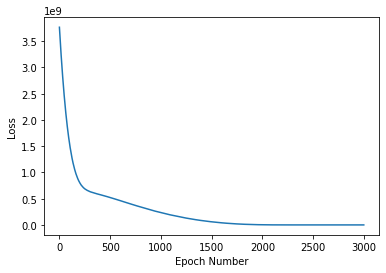

In [11]:
import tensorflow as tf

L0 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([L0])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())
history = model.fit(X_data, y, epochs=3000, verbose=False)
print("Finished training this model")

import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history['loss'])

In [14]:
print(X_data[:1])
print(model.predict(X_data[:1]))
print(y[0])

[[  191    92    88 36481  8464  7744]]
[[79126.54]]
79367


In [16]:
print(model.predict([[12,12,12,12**2,12**2,12**2]]))

[[1565.3313]]


In [15]:
saved_model_dir = 'save'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: save/assets
